In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("WinnipegDataset.txt")

In [3]:
dataset.head()

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB


In [5]:
dataset.isnull().sum().sum()

0

In [6]:
dataset["label"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [7]:
labels = dataset["label"].unique().tolist()

In [8]:
labels

[1, 2, 3, 4, 5, 6, 7]

In [9]:
for label in labels:
    label_data = dataset[dataset["label"] == label]
    label_data.info()
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39162 entries, 0 to 39161
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 52.6 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 39162 to 42759
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 4.8 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75673 entries, 42760 to 118432
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 101.6 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 118433 to 192499
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 99.5 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47117 entries, 192500 to 239616
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 63.3 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85074 entries, 239617 to 324690
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
m

In [10]:
seq_len = 128
num_sensors = 174

## 异常值

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

std = MinMaxScaler()
abnormal = set()
for label in labels:
    label_data = dataset[dataset["label"] == label]

    for sensor in range(num_sensors):
        col_name = "f" + str(sensor+1)
        # 只是为了检测异常传感器，取500个时间戳节省计算时间
        ts = std.fit_transform(label_data[col_name].values[500:1000].reshape(-1, 1))
        mean_value = ts.mean()
        std_value = ts.std()
        # print(f"mean:{mean_value}")
        # print(f"std:{std_value}")
        mode_value = stats.mode(ts)[0][0][0]
        mode_ratio = (ts==mode_value).sum() / 500
        # print(f"mode ratio:{mode_ratio}")

        # 标准差过小或众数比例过高，认为是异常
        if std_value < 0.05 or mode_ratio > 0.1:
            flag = "abnormal"
            abnormal.add(sensor+1)
        else:
            flag = "normal"
            
        # plt.plot(ts)
        # plt.title(str(sensor+1) + " " + flag)
        # plt.show()


mean:0.7878563813700287
std:0.1325883702426381
mode ratio:0.008
mean:0.7483047993877776
std:0.11530067494886406
mode ratio:0.006
mean:0.7367095947834189
std:0.11316254897125806
mode ratio:0.006
mean:0.7897691375968992
std:0.10378497753727725
mode ratio:0.006
mean:0.7979056632081897
std:0.12195031079632937
mode ratio:0.006
mean:0.8001691311255043
std:0.11467414568555992
mode ratio:0.008
mean:0.5499319923650876
std:0.20631192107131746
mode ratio:0.006
mean:0.4459531142541038
std:0.21432630424734136
mode ratio:0.004
mean:0.5709002282292343
std:0.1684279734355679
mode ratio:0.004
mean:0.419951311597354
std:0.23819562903483563
mode ratio:0.004
mean:0.669170619502036
std:0.2027665980097175
mode ratio:0.004
mean:0.5722050834061315
std:0.16955520164428167
mode ratio:0.004
mean:0.5212891949522843
std:0.21023480586348156
mode ratio:0.004
mean:0.6477714698642821
std:0.17030478983382893
mode ratio:0.004
mean:0.47553196630533295
std:0.20920532249248544
mode ratio:0.004
mean:0.3243746346647773
std:0

In [12]:
print(len(abnormal))

44


In [13]:
dataset.drop(columns=["f"+str(sensor) for sensor in abnormal], inplace=True)

# 滑动窗口扩充数据集

In [14]:
slicing_window_step = 4

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()

labels = dataset["label"].unique().tolist()

for label in labels:
    tss = []
    labels_array = []
    label_data = dataset[dataset["label"] == label]
    label_data = std.fit_transform(label_data)
    for i in range(0, label_data.shape[0]-seq_len, slicing_window_step):
        ts = label_data[i:i+seq_len, 1:].swapaxes(0, 1)
        labels_array.append(label)
        tss.append(ts)
    tss = np.stack(tss)
    labels_array = np.stack(labels_array)
    np.save(f"winnipeg_{label}.npy", tss)
    np.save(f"winnipeg_labels_{label}.npy", labels_array)
    print(tss.shape)
    print(labels_array.shape)

(9759, 130, 128)
(9759,)
(868, 130, 128)
(868,)
(18887, 130, 128)
(18887,)
(18485, 130, 128)
(18485,)
(11748, 130, 128)
(11748,)
(21237, 130, 128)
(21237,)
(254, 130, 128)
(254,)


# 查看数据集情况

63
104
107
85
123
55


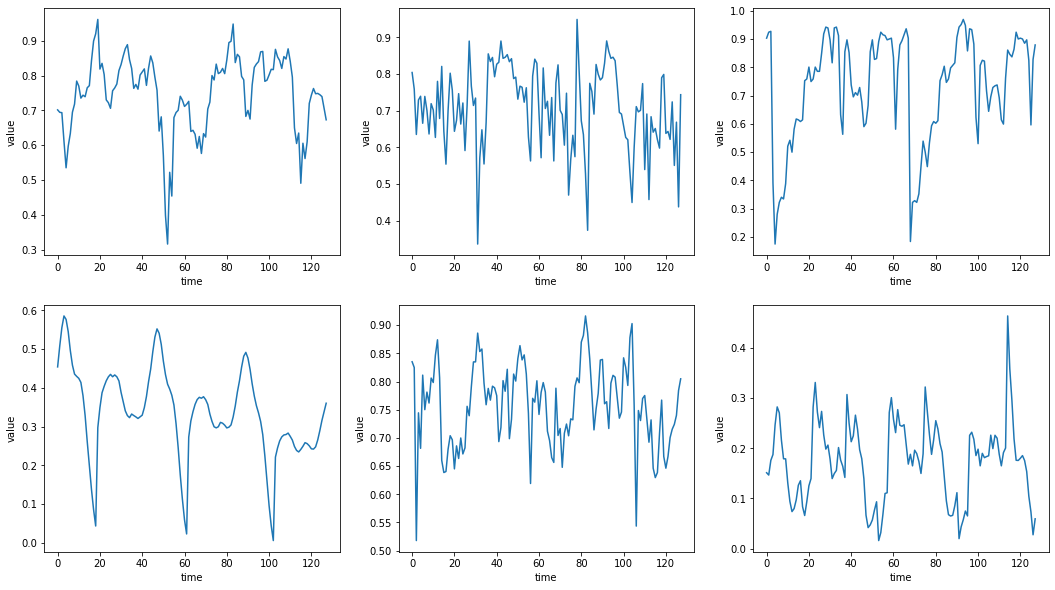

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
test = np.load("./winnipeg_2.npy")
plt.figure(figsize = (18, 10))
for count in range(1, 7):
    plt.subplot(2, 3, count)
    sample = random.randint(0, test.shape[0]-1)
    sensor = random.randint(0, test.shape[1]-1)
    print(sensor)
    plt.plot(test[sample, sensor, :])
    plt.xlabel('time')
    plt.ylabel('value')
plt.show()